# II. Modos de Vibración

## 1. Librerías

In [1]:
import numpy as np
np.set_printoptions(formatter = {'float': lambda x: '{0:0.3f}'.format(x)})

import matplotlib.pyplot as plt

from tabulate import tabulate

## 2. Grados de Libertad

In [2]:
while True:
    try:
        gdl = int(input('* Ingrese el número de grados de libertad: '))
        break
    except ValueError:
        print('! Ingrese un número de GDL válido.\n')

print(f'* El modelo es de {gdl} GDL.')

* El modelo es de 2 GDL.


## 3. Matriz de Rigidez

### 3.1 Rigideces de Entrepiso

In [3]:
k = np.empty(gdl)

for i in range(gdl):
    while True:
        try:
            k[i] = float(input(f'* Rigidez K{i + 1} (N/m): '))
            print(f'\n> Rigidez K{i + 1} = {k[i]} N/m')
            break
        except ValueError:
            print(f'\n! Ingrese un valor de K{i + 1} válido.')


> Rigidez K1 = 15555.6 N/m

> Rigidez K2 = 8717.9 N/m


### 3.2 Formulación de la Matriz de Rigidez

In [4]:
K = np.zeros((gdl, gdl))

for i in range(gdl):
    ## Cálculo de rigideces

    # Rigidez actual
    k1 = k[i]

    # Rigidez posterior
    try:
        k2 = k[i + 1]
    except IndexError:
        k2 = 0

    ## Llenado de la matriz

    # Posición actual
    K[i, i] = k1 + k2

    # Posición derecha
    if i + 1 < gdl:
        K[i, i + 1] = -k2

    # Posición izquierda
    if i - 1 >= 0:
        K[i, i - 1] = -k1

* Matriz de Rigidez:

$$
\textbf{K} = 
 \begin{pmatrix}
  K_1 + K_2 & -K_2 & 0 & \cdots & 0 & 0  \\
  -K_2 & K_2 + K_3 & - K_3 & \cdots & 0  & 0 \\
  0 & - K_3 &  K_3 + K_4 & \cdots & 0  & 0 \\
  \vdots  & \vdots  & \vdots  & \ddots & \vdots  & \vdots   \\
  0 & 0 &  0 & \cdots & K_{i-1} + K_{i} & -K_{i}\\
  0 & 0 &  0 & \cdots & -K_i & -K_{i}
 \end{pmatrix}
 $$

### 3.3 Representación de la Matriz de Rigidez

In [5]:
K_r = tabulate(K, tablefmt = 'fancy_grid')

print('• Matriz K =\n')
print(K_r)

• Matriz K =

╒═════════╤═════════╕
│ 24273.5 │ -8717.9 │
├─────────┼─────────┤
│ -8717.9 │  8717.9 │
╘═════════╧═════════╛


## 4. Matriz de Masas

### 4.1 Masas Concentradas

In [6]:
m = np.empty(gdl)

for i in range(gdl):
    while True:
        try:
            m[i] = float(input(f'* Masa M{i + 1} (kg): '))
            print(f'\n> Masa M{i + 1} = {m[i]} kg')
            break
        except ValueError:
            print(f'\n! Ingrese un valor de K{i + 1} válido.')


> Masa M1 = 15.474 kg

> Masa M2 = 15.025 kg


### 4.2 Formulación de la Matriz de Masas

In [7]:
M =  np.zeros((gdl, gdl))

for i in range(gdl):
    M[i, i] = m[i]

* Matriz de Masas:

$$
\textbf{M} =
\begin{pmatrix}
m_1 &   0   &   \cdots  &   0   \\
0   &   m_2 &   \cdots  &   0   \\
\vdots  &   \vdots  &   \ddots  &   \vdots \\
0   &   0   &   \cdots  &   m_i   
\end{pmatrix}
$$

### 4.3 Representación de la Matriz de Masas

In [8]:
M_r = tabulate(M, tablefmt = 'fancy_grid')

print('- Matriz M =\n')
print(M_r)

- Matriz M =

╒════════╤════════╕
│ 15.474 │  0     │
├────────┼────────┤
│  0     │ 15.025 │
╘════════╧════════╛


## 5. Frecuencias y Períodos

- Para el cálculo de las _frecuencias modales_ se parte de la expresión:  
<br />

$$
\textbf{K} \cdot \textbf{X} = \omega ^2 \ \textbf{M} \cdot \textbf{X}  \\[3pt]
$$

<br />

- Multiplicando por la _inversa de la Matriz de Masas_ $\textbf{M}^{-1}$ a ambos miembros se tiene:  

<br />

$$
\textbf{M}^{-1} \cdot \textbf{K}  \cdot \textbf{X} = \omega ^2 \ \textbf{X} \\[3pt]
$$

<br />

- Lo cual equivale al _Problema de Valores Característicos_ (PVC) de la matriz $\textbf{A}$.  

<br />

$$
\textbf{A} \cdot \textbf{X} = \lambda \cdot \textbf{X}
$$

### 5.1 Obtención de la Matriz A

In [9]:
M_ = np.linalg.inv(M)

A = np.matmul(M_, K)

### 5.2 Representación de la Matriz A

In [10]:
A_r = tabulate(A, tablefmt = 'fancy_grid')

print('- Matriz A:\n')
print(A_r)

- Matriz A:

╒══════════╤══════════╕
│ 1568.66  │ -563.39  │
├──────────┼──────────┤
│ -580.226 │  580.226 │
╘══════════╧══════════╛


### 5.3 Autovalores de A

In [11]:
A_lambda = np.linalg.eig(A)[0][::-1]

print('\n- Autovalores:')

for i in range(gdl):
    print(f'\n\t* λ{i + 1} = {A_lambda[i]:.2f}')


- Autovalores:

	* λ1 = 318.70

	* λ2 = 1830.19


### 5.4 Cálculo de Frecuencias

In [12]:
# Frecuencias circulares
w = np.sqrt(A_lambda)

print('\n- Frecuencias circulares (rad/s)')

for i in range(gdl):
    print(f'\n\t* w{i + 1} = {w[i]:.3f}')

# Frecuencias
f = w / (2 * np.pi)

print('\n- Frecuencias naturales (Hz)')

for i in range(gdl):
    print(f'\n\t* f{i + 1} = {f[i]:.3f}')


- Frecuencias circulares (rad/s)

	* w1 = 17.852

	* w2 = 42.781

- Frecuencias naturales (Hz)

	* f1 = 2.841

	* f2 = 6.809


### 5.5 Cálculo de Períodos

In [13]:
T = 1 / f

print('\n- Períodos naturales(s)')

for i in range(gdl):
    print(f'\n\t* T{i + 1} = {T[i]:.3f}')


- Períodos naturales(s)

	* T1 = 0.352

	* T2 = 0.147


## 6. Modos de Vibración

* A partir de la solución de la _matriz de vectores propios_ $\textbf{X}$ de la matriz $\textbf{A}$ se tiene:

<br/>

$$
\textbf{X}=\left[ \begin{Bmatrix} 
\\
X_i  \\\\
\end{Bmatrix}\cdots
\begin{Bmatrix} 
\\
X_2 \\\\
\end{Bmatrix}
\begin{Bmatrix} 
\\
X_1  \\\\
\end{Bmatrix} \right]
$$

<br/>

* Donde cada vector $X_{i}$ se conoce como modo de vibración. Este, es un vector unitario _tomado de forma vertical_ dentro de la matriz.

* Existen diversos métodos para normalizar los modos de vibración. El más conveniente, para una posterior aplicación del _Método Dinámico Modal Espectral_, es aquel respecto a la _Matriz de Masas_ $\textbf{M}$.

$$\phi_i = \frac{X_i}{\sqrt{\displaystyle  X_i^T \cdot \textbf{M} \cdot X_i}}$$

### 6.1 Matriz de Vectores Propios

In [14]:
X = np.round(np.linalg.eig(A)[1], 4)

X_r = tabulate(X, tablefmt = 'fancy_grid')

print('- Matriz X:\n')
print(X_r)

- Matriz X:

╒════════╤════════╕
│  0.907 │ 0.4109 │
├────────┼────────┤
│ -0.421 │ 0.9117 │
╘════════╧════════╛


### 6.2 Vectores de Modos de Vibración

In [15]:
# Traspuesta de la matriz de autovectores de A
Xt = X.transpose()

x = np.empty((gdl, gdl))

print('\n- Vectores Φ:')

for i in range(gdl):
    x[i] = Xt[gdl - i - 1].flatten()
    print(f'\n\t* Vector X{i + 1} = {x[i]}')


- Vectores Φ:

	* Vector X1 = [0.411 0.912]

	* Vector X2 = [0.907 -0.421]


### 6.3 Normalización Respecto a la Matriz de Masas

In [16]:
phi = np.copy(x)

for i in range(gdl):
    # Normalización en una línea, por César Sánchez
    phi[i] = x[i] / np.sqrt(x[i] @ M @ x[i].reshape(-1, 1))

print('\n- Vectores Normalizados Φ:')

for i in range(gdl):
    print(f'\n\t* Vector Φ{i + 1} = {phi[i]}')


- Vectores Normalizados Φ:

	* Vector Φ1 = [0.106 0.235]

	* Vector Φ2 = [0.231 -0.107]


## 7. Interpretación de Resultados

In [17]:
plt.rcParams['figure.figsize'] = 4.5 * len(phi), 8
plt.rcParams['font.family'] = 'Cascadia Mono'
plt.style.use('grayscale')

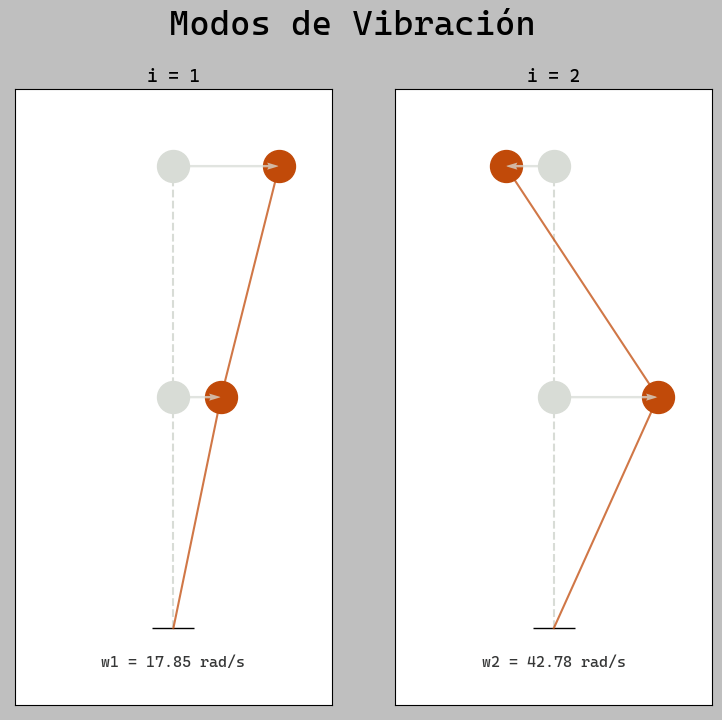

In [18]:
# Creación de subplots
fig, axs = plt.subplots(1, gdl)

# Título global
fig.suptitle('Modos de Vibración', fontsize = '25')

for i, x in enumerate(phi):
    y = []

    for j in range(len(phi[i])):
        y.append(6 * (j + 1) / len(phi[i]))

    axs[i].set_title(f'i = {i + 1}', fontsize = '13')
    
    axs[i].yaxis.set_visible(False)
    axs[i].xaxis.set_visible(False)

    axs[i].plot(0, 0, marker = '_', markersize = 30)

    # Posición inicial
    axs[i].plot(np.zeros(len(phi[i])), y, marker = 'o', markersize = 23, linestyle = '', color = '#d8dcd6', zorder = 0)
    axs[i].plot(np.zeros(len(phi[i]) + 1), np.append(0, y), linestyle = '--', color = '#d8dcd6')

    
    # Posición final
    axs[i].plot(x, y, marker = 'o', markersize = 23, linestyle = '', color = '#c14a09', zorder = 1)
    axs[i].plot(np.append(0, x), np.append(0, y), linestyle = '-', color = '#c14a09', alpha = 0.75)

    # Vectores desplazamiento
    axs[i].quiver(np.zeros(len(phi[i])), y, x, np.zeros(len(phi[i])), scale = 1, zorder = 2, color = '#d8dcd6', units = 'x', alpha = 0.75)

    # Frecuencias circulares
    axs[i].text(0, -0.5, f'w{i + 1} = {w[i]:.2f} rad/s', fontsize = 11, ha = 'center', color = '#363737')

    axs[i].set_xlim([-1.5 * abs(phi).max(), 1.5 * abs(phi).max()])
    axs[i].set_ylim([-1, 7])

plt.show()

## 8. Dependencias

In [19]:
%load_ext watermark

# Compilador y librerías
%watermark -v
%watermark -iv

# Sistema operativo
%watermark -m

# Fecha de subida
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.9.5
IPython version      : 7.24.1

sys       : 3.9.5 (default, May 18 2021, 14:42:02) [MSC v.1916 64 bit (AMD64)]
matplotlib: 3.3.4
numpy     : 1.20.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 3, GenuineIntel
CPU cores   : 12
Architecture: 64bit

Last updated: Sun Jun 20 2021 12:06:32SA Pacific Standard Time

